In [5]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [226]:
housing = pd.read_csv(r"C:\Users\rupal\Ames_Housing_Price_Data.csv", index_col=0)

In [101]:
pd.set_option("display.max_columns", None)

In [102]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [103]:
housing.shape

(2580, 81)

In [104]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [105]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [106]:

total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data


,Total,Percent
PoolQC,2571,0.996512
MiscFeature,2483,0.962403
Alley,2412,0.934884
Fence,2055,0.796512
FireplaceQu,1241,0.481008
...,...,...
HeatingQC,0,0.000000
Heating,0,0.000000
SaleType,0,0.000000
Foundation,0,0.000000


In [107]:
# all numerical columns
numerical = housing.select_dtypes(include = ['float64', 'int64'])
numerical

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,NaN,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,80.0,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,70.0,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,NaN,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,NaN,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,82.0,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,NaN,8826,7,5,2000,2000,144.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,7,1,2000.0,2.0,486.0,193,96,0,0,0,0,0,7,2007


In [108]:
numerical.isnull().sum(axis = 0)

PID                0
GrLivArea          0
SalePrice          0
MSSubClass         0
LotFrontage      462
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        14
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      129
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

array([[<AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'BsmtFullBath'}>

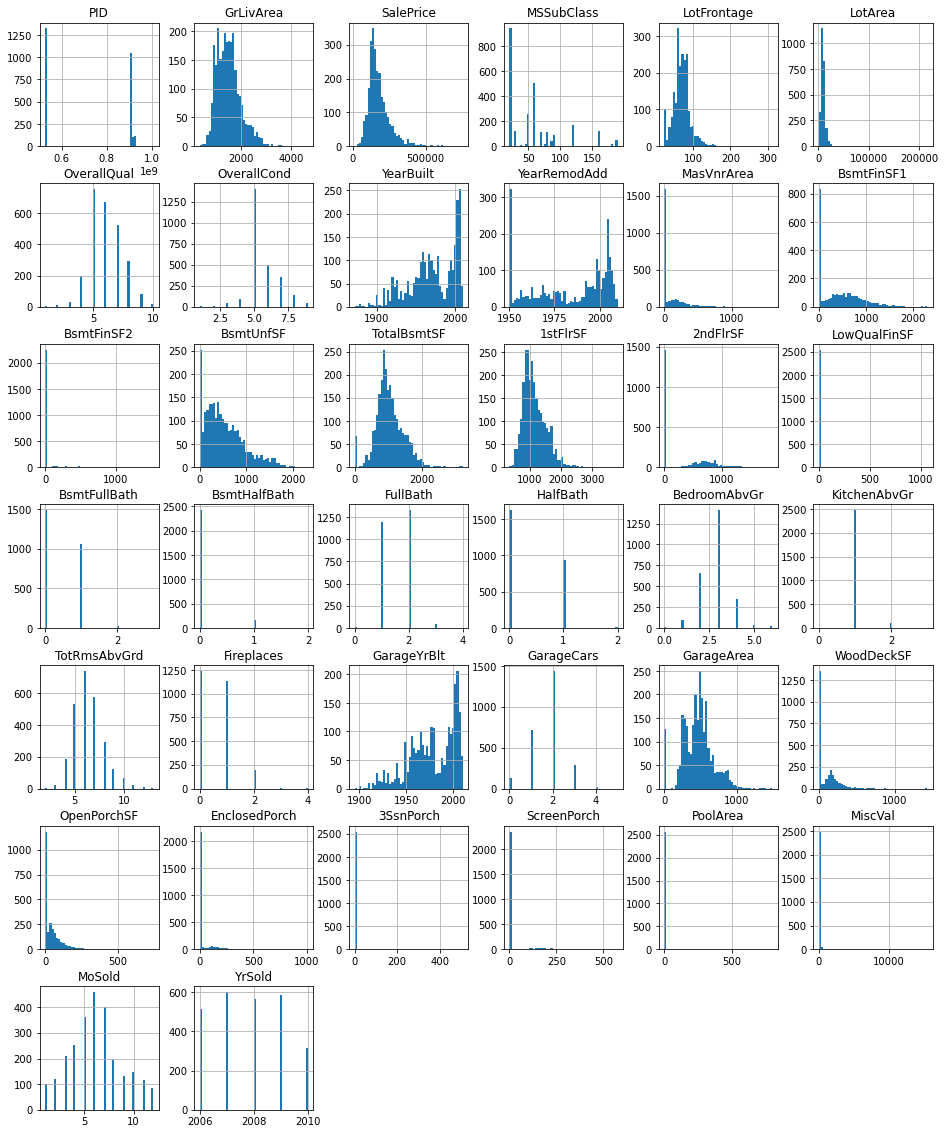

In [109]:
numerical.hist(figsize=(16, 20),bins=50)

In [110]:
corelation_list=housing.corr()['SalePrice'].sort_values(ascending=False)
corelation_list

SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652222
1stFlrSF         0.642613
GarageCars       0.638801
GarageArea       0.634992
YearBuilt        0.544370
FullBath         0.534982
GarageYrBlt      0.520763
YearRemodAdd     0.514309
MasVnrArea       0.500964
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.460792
LotFrontage      0.358577
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.291080
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.167519
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022520
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033802
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
PID             -0.226276
Name: SalePr

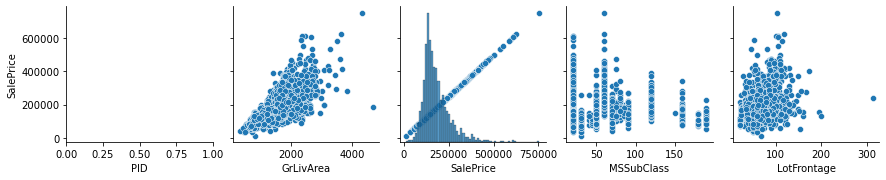

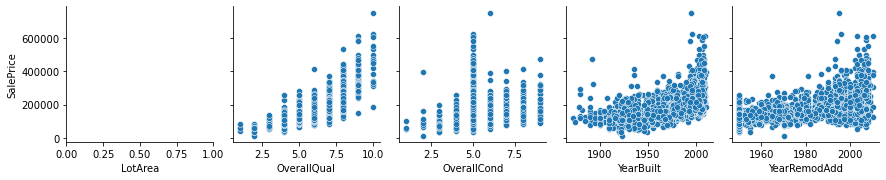

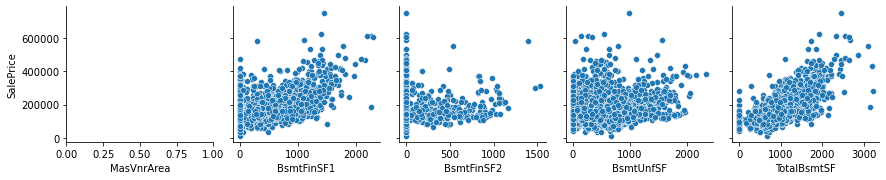

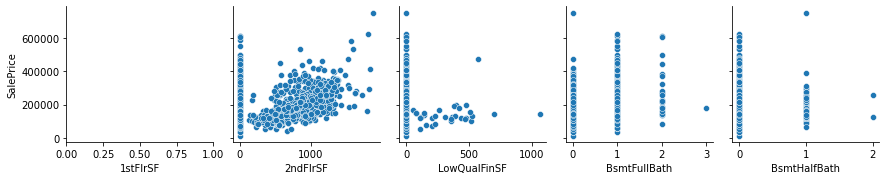

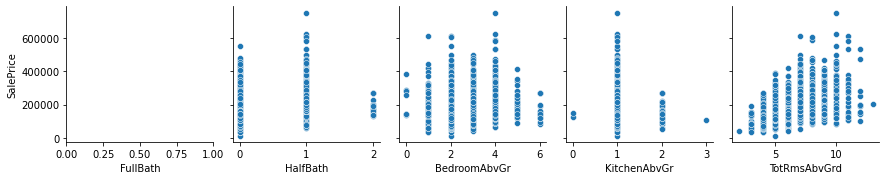

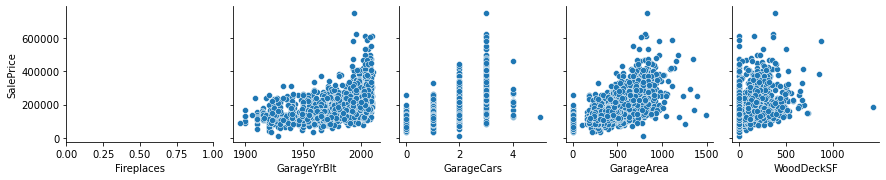

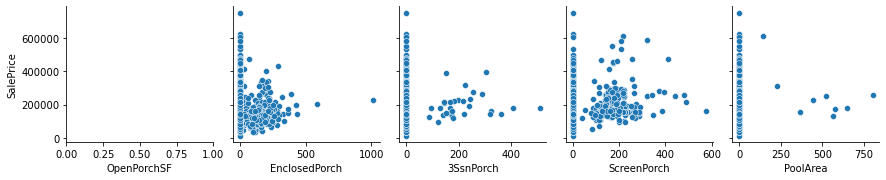

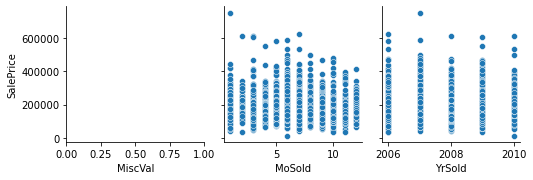

In [111]:
for i in range(0, len(numerical.columns), 5):
    sns.pairplot(data=numerical,
                x_vars=numerical.columns[i:i+5],
                y_vars=['SalePrice'])

In [112]:
# sales price 

print(housing['SalePrice'].describe())

count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64


(array([  1.,   5.,   8.,  27.,  74.,  92., 173., 310., 348., 287., 221.,
        216., 145., 131., 102.,  87.,  66.,  59.,  40.,  29.,  34.,  25.,
         17.,   7.,  21.,  10.,   9.,   8.,   4.,   4.,   5.,   3.,   2.,
          0.,   0.,   2.,   1.,   0.,   2.,   0.,   3.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 12789.  ,  27633.22,  42477.44,  57321.66,  72165.88,  87010.1 ,
        101854.32, 116698.54, 131542.76, 146386.98, 161231.2 , 176075.42,
        190919.64, 205763.86, 220608.08, 235452.3 , 250296.52, 265140.74,
        279984.96, 294829.18, 309673.4 , 324517.62, 339361.84, 354206.06,
        369050.28, 383894.5 , 398738.72, 413582.94, 428427.16, 443271.38,
        458115.6 , 472959.82, 487804.04, 502648.26, 517492.48, 532336.7 ,
        547180.92, 562025.14, 576869.36, 591713.58, 606557.8 , 621402.02,
        636246.24, 651090.46, 665934.68, 680778.9 , 695623.12, 710467.34,
        725311.56, 740155.78, 755000.  ]),
 <BarContainer object o

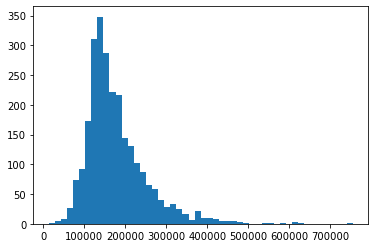

In [113]:
plt.hist(housing.SalePrice, bins=50)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   2.,   0.,   2.,   1.,   5.,   6.,  13.,   6.,  14.,
         35.,  49.,  43.,  72., 117., 172., 253., 269., 252., 184., 229.,
        168., 152., 129., 105.,  79.,  57.,  51.,  34.,  29.,  20.,  10.,
          8.,   2.,   2.,   5.,   0.,   1.]),
 array([ 9.45634071,  9.53790335,  9.619466  ,  9.70102864,  9.78259129,
         9.86415394,  9.94571658, 10.02727923, 10.10884188, 10.19040452,
        10.27196717, 10.35352982, 10.43509246, 10.51665511, 10.59821776,
        10.6797804 , 10.76134305, 10.8429057 , 10.92446834, 11.00603099,
        11.08759363, 11.16915628, 11.25071893, 11.33228157, 11.41384422,
        11.49540687, 11.57696951, 11.65853216, 11.74009481, 11.82165745,
        11.9032201 , 11.98478275, 12.06634539, 12.14790804, 12.22947068,
        12.31103333, 12.39259598, 12.47415862, 12.55572127, 12.63728392,
        12.71884656, 12.80040921, 12.88197186, 12.9635345 , 13.04509715,
 

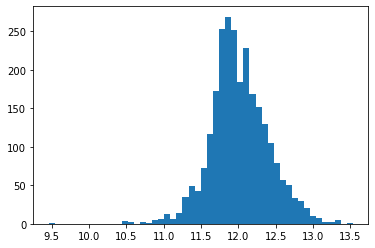

In [114]:
# sales price after log transformation
plt.hist(np.log(housing.SalePrice), bins=50)

In [115]:
# 11 houses more than 500000
housing[housing['SalePrice'] > 500000].shape

(11, 81)

In [116]:
housing_size= housing.filter(regex='SF$|Area$')

In [117]:
housing_size.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
1,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0
2,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
3,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
4,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0
5,1665,8400,0.0,167.0,810.0,810,855,0,528.0,0,45,0


In [118]:
housing_size.columns

Index(['GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolArea'],
      dtype='object')

In [119]:
housing_size.shape

(2580, 12)

In [120]:
housing_size.isnull().sum(axis=0)

GrLivArea        0
LotArea          0
MasVnrArea      14
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
PoolArea         0
dtype: int64

array([[<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GarageArea'}>],
       [<AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'PoolArea'}>]], dtype=object)

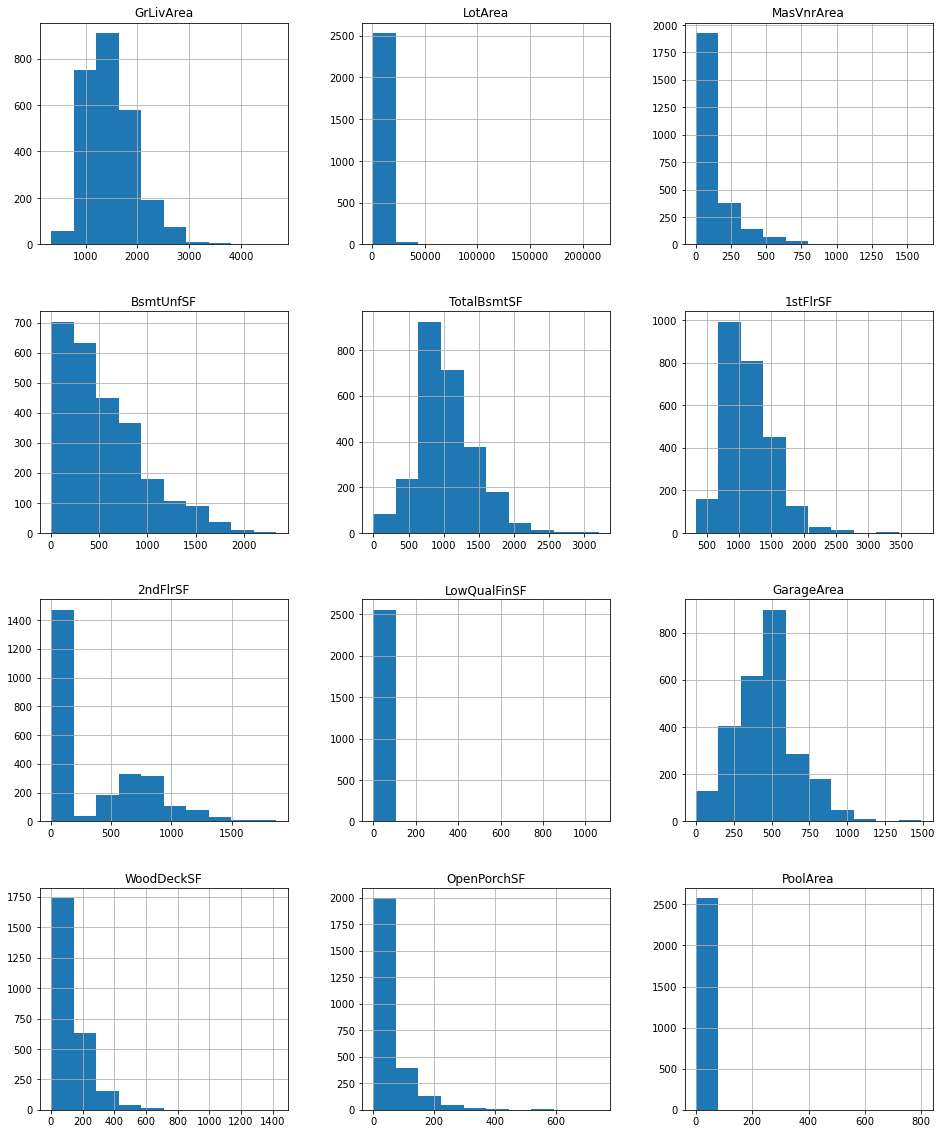

In [121]:

housing_size.hist(figsize=(16,20))

In [122]:
sale_price=housing[['SalePrice']]

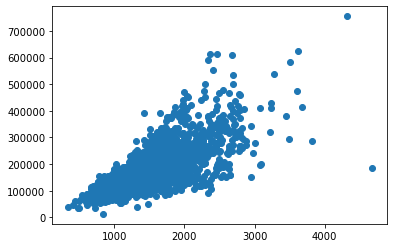

In [123]:
# sales price vs GrlivArea
plt.scatter(housing_size.GrLivArea,sale_price)

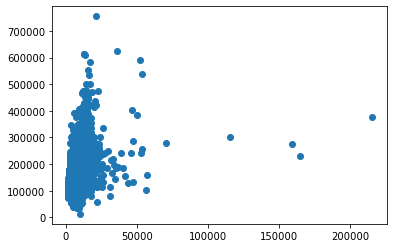

In [124]:
#sales price vs lot area
plt.scatter(housing_size.LotArea,sale_price)

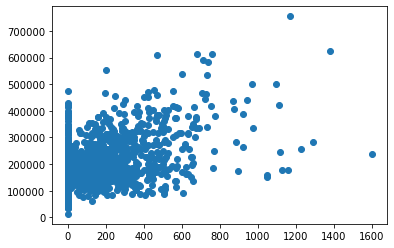

In [125]:
#sales price vs MasVnrArea
plt.scatter(housing_size.MasVnrArea,sale_price)

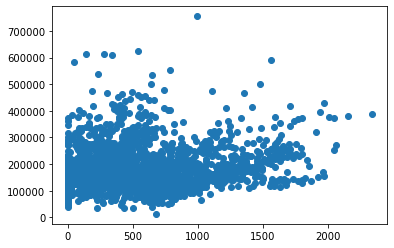

In [126]:
#sales price vs BsmtUnfSF
plt.scatter(housing_size.BsmtUnfSF,sale_price)

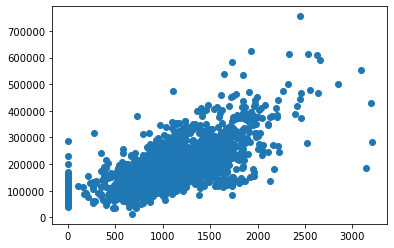

In [127]:
#sales price vs total basement sf
plt.scatter(housing_size.TotalBsmtSF,sale_price)

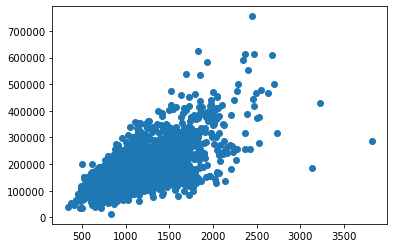

In [128]:
#sales price vs !st Floor
plt.scatter(housing_size['1stFlrSF'],sale_price)

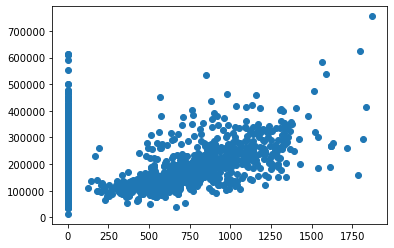

In [129]:
#sale price vs 2nd floor
plt.scatter(housing_size['2ndFlrSF'],sale_price)

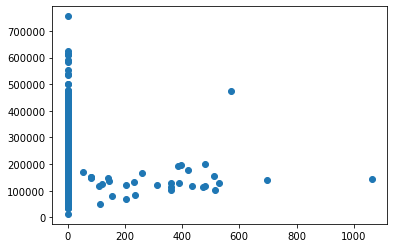

In [130]:
#sales price vs LowQualFinSF
plt.scatter(housing_size.LowQualFinSF,sale_price)

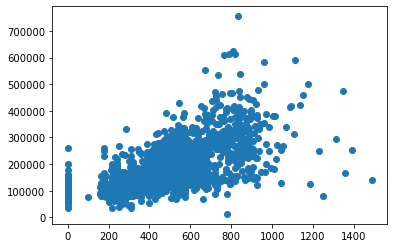

In [131]:
#sales price vs GarageArea
plt.scatter(housing_size.GarageArea,sale_price)

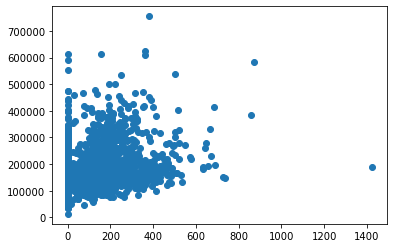

In [132]:
#sales price vs WoodDeckSF
plt.scatter(housing_size.WoodDeckSF,sale_price)

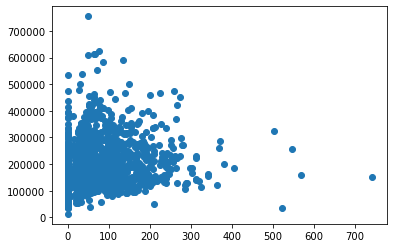

In [133]:
#sales price vs open porch sf
plt.scatter(housing_size.OpenPorchSF,sale_price)

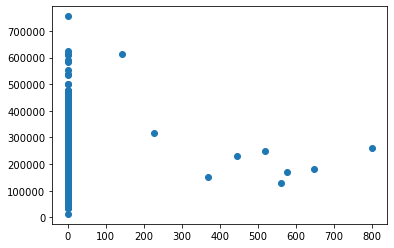

In [134]:
#sales price vs PoolArea
plt.scatter(housing_size.PoolArea,sale_price)

In [135]:
categorical = housing.select_dtypes(include ='object')
categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,Po,N,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,N,FuseF,Fa,Typ,Gd,Detchd,Unf,Fa,Po,P,NaN,NaN,NaN,WD,Normal
760,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Wd Sdng,None,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,Ex,Y,FuseA,TA,Min2,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
761,RH,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,N,FuseA,TA,Typ,NaN,2Types,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
762,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [136]:
#value_counts for categorical volume

for name in categorical.columns:
    print
    print(name, categorical[name].value_counts())
    print("-" * 50)

MSZoning RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64
--------------------------------------------------
Street Pave    2570
Grvl      10
Name: Street, dtype: int64
--------------------------------------------------
Alley Grvl    105
Pave     63
Name: Alley, dtype: int64
--------------------------------------------------
LotShape Reg    1641
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64
--------------------------------------------------
LandContour Lvl    2337
HLS      96
Bnk      95
Low      52
Name: LandContour, dtype: int64
--------------------------------------------------
Utilities AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64
--------------------------------------------------
LotConfig Inside     1886
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64
--------------------------------------------------
LandSlope

In [137]:
# unique values in categorical columns

for name in categorical.columns:
    print()
    print(name, categorical[name].unique())
    print("_" * 50)



MSZoning ['RL' 'C (all)' 'RM' 'FV' 'RH' 'I (all)' 'A (agr)']
__________________________________________________

Street ['Pave' 'Grvl']
__________________________________________________

Alley [nan 'Pave' 'Grvl']
__________________________________________________

LotShape ['Reg' 'IR1' 'IR3' 'IR2']
__________________________________________________

LandContour ['Lvl' 'Bnk' 'HLS' 'Low']
__________________________________________________

Utilities ['AllPub' 'NoSewr']
__________________________________________________

LotConfig ['Corner' 'Inside' 'FR2' 'CulDSac' 'FR3']
__________________________________________________

LandSlope ['Gtl' 'Mod' 'Sev']
__________________________________________________

Neighborhood ['SWISU' 'Edwards' 'IDOTRR' 'OldTown' 'NWAmes' 'Blmngtn' 'Mitchel'
 'NridgHt' 'NAmes' 'CollgCr' 'SawyerW' 'MeadowV' 'BrDale' 'Gilbert'
 'Timber' 'Somerst' 'BrkSide' 'NoRidge' 'Sawyer' 'Crawfor' 'Greens'
 'ClearCr' 'GrnHill' 'StoneBr' 'Veenker' 'NPkVill' 'Blueste' 'Landmrk']


In [138]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [139]:
garage=housing[['GarageType','GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']]

In [140]:
garage.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1,Detchd,1939.0,Unf,2.0,399.0,TA,TA
2,Attchd,1984.0,Fin,1.0,266.0,TA,TA
3,Detchd,1930.0,Unf,1.0,216.0,TA,Po
4,Detchd,1940.0,Unf,1.0,281.0,TA,TA
5,Attchd,2001.0,Fin,2.0,528.0,TA,TA


In [141]:
garage.isnull().sum(axis =0)

GarageType      127
GarageYrBlt     129
GarageFinish    129
GarageCars        1
GarageArea        1
GarageQual      129
GarageCond      129
dtype: int64

In [142]:
garage.GarageType.unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [143]:
#garage['GarageType']

garage[garage['GarageType']==""]


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond


In [144]:
utilities=housing[['Heating', 'HeatingQC', 'CentralAir', 'Electrical','Utilities']]

In [145]:
utilities.isnull().sum(axis=0).to_frame("null count")

,null count
Heating,0
HeatingQC,0
CentralAir,0
Electrical,1
Utilities,0


In [146]:
utilities.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', nan], dtype=object)

In [147]:
#Miscllaneous features EDA

In [148]:
misc=housing[[ "SalePrice","Heating","HeatingQC","Electrical", "FireplaceQu"]]

In [149]:
misc.head()

,SalePrice,Heating,HeatingQC,Electrical,FireplaceQu
1,126000,GasA,TA,SBrkr,Gd
2,139500,GasA,TA,SBrkr,NaN
3,124900,GasA,Ex,SBrkr,NaN
4,114000,GasA,Gd,SBrkr,NaN
5,227000,GasA,Ex,SBrkr,NaN


In [150]:
misc['Heating'].value_counts().to_frame("counts")

,counts
GasA,2540
GasW,25
Grav,7
Wall,5
OthW,2
Floor,1


In [151]:
# no null values
misc['Heating'].isnull().sum()

0

In [152]:
misc['HeatingQC'].value_counts().to_frame("counts")

,counts
Ex,1293
TA,768
Gd,434
Fa,84
Po,1


In [153]:
# no null values
misc['HeatingQC'].isnull().sum()

0

In [154]:
misc['Electrical'].value_counts().to_frame("counts")

,counts
SBrkr,2365
FuseA,168
FuseF,39
FuseP,7


In [155]:
misc['Electrical'].isnull().sum()

1

In [156]:
# number of missing in Electrical =1, substituted with majority "SBrKr"
misc.loc[misc.Electrical.isnull(),'Electrical']="SBrkr"

C:\Users\rupal\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [157]:
misc['FireplaceQu'].value_counts().to_frame("counts")

,counts
Gd,619
TA,572
Fa,70
Po,43
Ex,35


In [158]:
misc['FireplaceQu'].isnull().sum()

1241

In [159]:
# number of missing in FireplaceQu = 1241, substituted with "nfp", no fireplace as per data description
misc.loc[misc.FireplaceQu.isnull(),'FireplaceQu']="nfp"

C:\Users\rupal\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [160]:
misc.isnull().sum(axis =0)

SalePrice      0
Heating        0
HeatingQC      0
Electrical     0
FireplaceQu    0
dtype: int64

In [161]:
misc['FireplaceQu'].value_counts().to_frame("counts")

,counts
nfp,1241
Gd,619
TA,572
Fa,70
Po,43
Ex,35


In [162]:
#misc.to_csv('./misc.csv')

In [163]:
# GasA is the dominant class in Heating
misc.Heating.mode()

0    GasA
dtype: object

In [164]:
#Dummifying Heating and dropping the dominant class GasA
dummy_heating= pd.get_dummies(misc['Heating'], prefix='ht', prefix_sep='_')
dummy_heating=dummy_heating.drop("ht_GasA", axis = 1)
dummy_heating

,ht_Floor,ht_GasW,ht_Grav,ht_OthW,ht_Wall
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
...,...,...,...,...,...
759,0,0,1,0,0
760,0,0,0,0,0
761,0,0,0,0,0
762,0,0,0,0,0


In [165]:
# Dummifying HeatingQC
dummy_heating_QC = pd.get_dummies(misc['HeatingQC'], prefix='htQC', prefix_sep='_')
dummy_heating_QC

,htQC_Ex,htQC_Fa,htQC_Gd,htQC_Po,htQC_TA
1,0,0,0,0,1
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
5,1,0,0,0,0
...,...,...,...,...,...
759,0,1,0,0,0
760,1,0,0,0,0
761,0,0,0,0,1
762,1,0,0,0,0


In [166]:
# Ex is the dominant class in HeatingQC
misc.HeatingQC.mode()

0    Ex
dtype: object

In [167]:
# dominant class(Ex) dropped
dummy_heating_QC= dummy_heating_QC.drop("htQC_Ex", axis = 1)
dummy_heating_QC


,htQC_Fa,htQC_Gd,htQC_Po,htQC_TA
1,0,0,0,1
2,0,0,0,1
3,0,0,0,0
4,0,1,0,0
5,0,0,0,0
...,...,...,...,...
759,1,0,0,0
760,0,0,0,0
761,0,0,0,1
762,0,0,0,0


In [168]:
# Dummifying Electrical
dummy_electrical=pd.get_dummies(misc['Electrical'], prefix='Elec', prefix_sep='_')
dummy_electrical

,Elec_FuseA,Elec_FuseF,Elec_FuseP,Elec_SBrkr
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
...,...,...,...,...
759,0,1,0,0
760,1,0,0,0
761,1,0,0,0
762,0,0,0,1


In [169]:
# SBrkr is the dominant class in Electrical
misc.Electrical.mode()

0    SBrkr
dtype: object

In [170]:
# dropping the dominant class Elec_SBrkr
dummy_electrical= dummy_electrical.drop("Elec_SBrkr", axis=1)
dummy_electrical

,Elec_FuseA,Elec_FuseF,Elec_FuseP
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
...,...,...,...
759,0,1,0
760,1,0,0
761,1,0,0
762,0,0,0


In [171]:
#Dummifying FireplaceQu
dummy_fpQuality= pd.get_dummies(misc['FireplaceQu'], prefix='fpQu', prefix_sep='_')
dummy_fpQuality

,fpQu_Ex,fpQu_Fa,fpQu_Gd,fpQu_Po,fpQu_TA,fpQu_nfp
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
...,...,...,...,...,...,...
759,0,0,1,0,0,0
760,0,0,1,0,0,0
761,0,0,0,0,0,1
762,0,0,0,0,1,0


In [172]:
# nfp is the dominant class in FireplaceQu
misc.FireplaceQu.mode()

0    nfp
dtype: object

In [173]:
# drop the dominant class nfp
dummy_fpQuality= dummy_fpQuality.drop("fpQu_nfp", axis = 1)
dummy_fpQuality

,fpQu_Ex,fpQu_Fa,fpQu_Gd,fpQu_Po,fpQu_TA
1,0,0,1,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
...,...,...,...,...,...
759,0,0,1,0,0
760,0,0,1,0,0
761,0,0,0,0,0
762,0,0,0,0,1


In [174]:
misc_saleprice = misc.drop(["Heating","HeatingQC","Electrical", "FireplaceQu"], axis =1)

In [175]:
price_and_heating = pd.concat([misc_saleprice,dummy_heating], axis=1)
price_and_heating

,SalePrice,ht_Floor,ht_GasW,ht_Grav,ht_OthW,ht_Wall
1,126000,0,0,0,0,0
2,139500,0,0,0,0,0
3,124900,0,0,0,0,0
4,114000,0,0,0,0,0
5,227000,0,0,0,0,0
...,...,...,...,...,...,...
759,121000,0,0,1,0,0
760,139600,0,0,0,0,0
761,145000,0,0,0,0,0
762,217500,0,0,0,0,0


In [176]:
# regression on heating and sales price
ols = linear_model.LinearRegression()
ols.fit(dummy_heating, misc_saleprice)

LinearRegression()

In [177]:
ols.coef_

array([[-106207.53897638,  -16152.37897638,  -87421.82469066,
         -52957.53897638,  -88747.53897638]])

In [178]:
ols.score(dummy_heating,misc_saleprice)

0.007934972875623836

In [179]:
# regression on dummy_heating_QC and sales price
ols.fit(dummy_heating_QC,misc_saleprice)

LinearRegression()

In [180]:
ols.coef_

array([[ -85574.37791404,  -54807.42706919, -124115.11600928,
         -70552.58475928]])

In [181]:
ols.score(dummy_heating_QC,misc_saleprice)

0.20235536653584862

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

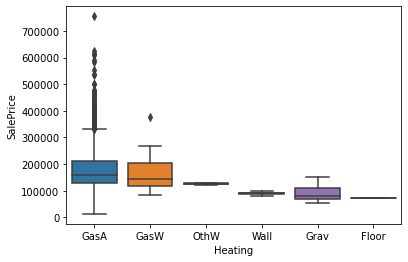

In [182]:
ordered= misc.groupby(["Heating"])['SalePrice'].median().sort_values(ascending= False).index
sns.boxplot(x='Heating',y='SalePrice', data =misc,order=ordered)

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

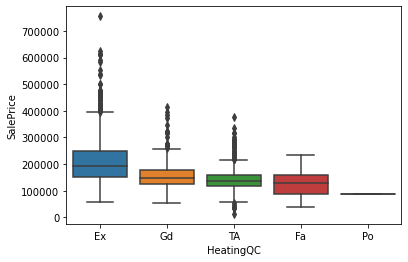

In [183]:
ordered=misc.groupby("HeatingQC")['SalePrice'].median().sort_values(ascending=False).index
sns.boxplot(x='HeatingQC',y='SalePrice',data= misc, order=ordered)

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

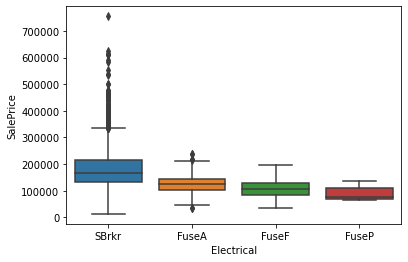

In [184]:
ordered=misc.groupby("Electrical")['SalePrice'].median().sort_values(ascending=False).index
sns.boxplot(x='Electrical',y='SalePrice',data= misc, order=ordered)

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

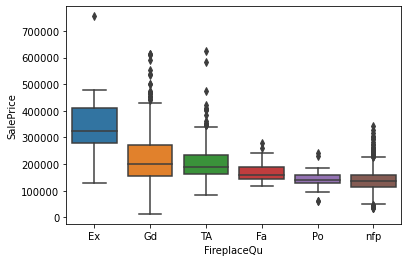

In [185]:
ordered=misc.groupby("FireplaceQu")['SalePrice'].median().sort_values(ascending=False).index
sns.boxplot(x='FireplaceQu',y='SalePrice',data= misc, order=ordered)

In [47]:
# Start of Random Forest

In [48]:
housing_fill_drop1= pd.read_csv(r"C:\Users\rupal\housing_fill_drop1.csv", index_col=0)

In [49]:
housing_fill_drop1

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,59.0,7890,Pave,Naa,Reg,...,0,0,166,0,Nf,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,Naa,Reg,...,0,0,0,0,Nf,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,Naa,Reg,...,42,86,0,0,Nf,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,Naa,Reg,...,168,0,111,0,Nf,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,Naa,Reg,...,0,0,0,0,Nf,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,56.0,8854,Pave,Naa,Reg,...,0,0,40,0,Nf,0,5,2009,WD,Normal
760,905402060,1733,139600,20,RL,65.0,13680,Pave,Naa,IR1,...,0,0,0,0,Nf,0,6,2009,WD,Normal
761,909275030,2002,145000,90,RH,82.0,6270,Pave,Naa,Reg,...,0,0,0,0,Nf,0,8,2007,WD,Normal
762,907192040,1842,217500,60,RL,70.0,8826,Pave,Naa,Reg,...,0,0,0,0,Nf,0,7,2007,WD,Normal


In [50]:
# making a copy
housing_fill_drop1C=housing_fill_drop1.copy()

In [51]:
# Dropping the columns
housing_fill_drop1C= housing_fill_drop1C.drop(["BsmtHalfBath","KitchenAbvGr","BsmtFinSF2","BsmtUnfSF","WoodDeckSF",
                        "OpenPorchSF","EnclosedPorch", "3SsnPorch","ScreenPorch","OverallCond","MSSubClass",
                        "ExterCond" ,"Functional","BsmtCond","BsmtFinType1", "BsmtFinType2","GarageCond","GarageQual",
                         "RoofStyle","RoofMatl","Exterior2nd","MasVnrArea","Utilities","CentralAir",
                        "Fireplaces","PoolArea","Fence","MiscVal","Alley","LandContour",
                        "LotShape", "SaleCondition","SaleType","Condition2","MoSold","HalfBath","GarageCars"], axis=1)

In [52]:
#housing_fill_drop1C.to_csv("./housing_fill_drop1C.csv")

In [53]:
housing_fill_drop1C.shape

(2580, 42)

In [54]:
# creating a dataframe of all non numerical/categorical columns.
housing_fill_drop1C_cat= housing_fill_drop1C.select_dtypes(include ='object')


In [55]:
housing_fill_drop1C_cat.shape

(2580, 22)

In [56]:
housing_fill_drop1C_cat.dtypes

MSZoning        object
Street          object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
BldgType        object
HouseStyle      object
Exterior1st     object
MasVnrType      object
ExterQual       object
Foundation      object
BsmtQual        object
BsmtExposure    object
Heating         object
HeatingQC       object
Electrical      object
KitchenQual     object
FireplaceQu     object
GarageType      object
GarageFinish    object
PavedDrive      object
dtype: object

In [57]:
# converting all categorical columns from object type to string
housing_fill_drop1C_cat = housing_fill_drop1C_cat.astype(str)

In [58]:
# Label encoding all the categorical columns
labelencoder=LabelEncoder()
categorical = list(housing_fill_drop1C_cat.select_dtypes(include=['object']).columns.values)
for cat in categorical:
    housing_fill_drop1C_cat[cat]=labelencoder.fit_transform(housing_fill_drop1C_cat[cat])
    

In [59]:
 housing_fill_drop1C_cat

,MSZoning,Street,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,Exterior1st,MasVnrType,...,BsmtQual,BsmtExposure,Heating,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,PavedDrive
1,5,1,0,0,21,2,0,2,13,2,...,5,4,1,4,3,4,2,5,3,2
2,5,1,4,0,7,2,4,2,6,1,...,2,2,1,4,3,2,3,1,0,2
3,1,1,4,0,11,2,0,2,8,2,...,5,4,1,0,3,2,3,5,3,0
4,5,1,0,0,20,2,0,5,8,2,...,1,4,1,2,3,4,3,5,3,0
5,5,1,4,0,17,2,0,5,12,2,...,2,4,1,0,3,2,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,5,1,4,0,3,2,0,1,13,2,...,5,4,3,1,1,1,2,5,3,1
760,5,1,1,0,7,2,0,2,3,2,...,3,3,1,0,0,4,2,1,3,2
761,4,1,4,0,6,2,2,5,8,2,...,5,4,1,4,0,4,3,0,3,2
762,5,1,4,0,5,2,0,5,12,1,...,2,4,1,0,3,2,5,1,0,2


In [60]:
housing_fill_drop1C_cat.columns

Index(['MSZoning', 'Street', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive'],
      dtype='object')

In [61]:
# Dropping the original columns after encoding
housing_fill_drop1C= housing_fill_drop1C.drop(['MSZoning', 'Street', 'LotConfig', 'LandSlope', 'Neighborhood',
                   'Condition1', 'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType',
                   'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating',
                   'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu',
                   'GarageType','GarageFinish','PavedDrive'], axis=1)

In [62]:
housing_fill_drop1C.head()

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,YrSold
1,909176150,856,126000,59.0,7890,6,1939,1950,238.0,856.0,856,0,0,1.0,1,2,4,1939.0,399.0,2010
2,905476230,1049,139500,42.0,4235,5,1984,1984,552.0,1049.0,1049,0,0,1.0,2,2,5,1984.0,266.0,2009
3,911128020,1001,124900,60.0,6060,5,1930,2007,737.0,837.0,1001,0,0,0.0,1,2,5,1930.0,216.0,2007
4,535377150,1039,114000,80.0,8146,4,1900,2003,0.0,405.0,717,322,0,0.0,1,2,6,1940.0,281.0,2009
5,534177230,1665,227000,70.0,8400,8,2001,2001,643.0,810.0,810,855,0,1.0,2,3,6,2001.0,528.0,2009


In [63]:
# joining the numerical and encoded dataframe
housing_final_RF= pd.concat([housing_fill_drop1C, housing_fill_drop1C_cat], axis=1)

In [64]:
housing_final_RF.head()

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,...,BsmtQual,BsmtExposure,Heating,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,PavedDrive
1,909176150,856,126000,59.0,7890,6,1939,1950,238.0,856.0,...,5,4,1,4,3,4,2,5,3,2
2,905476230,1049,139500,42.0,4235,5,1984,1984,552.0,1049.0,...,2,2,1,4,3,2,3,1,0,2
3,911128020,1001,124900,60.0,6060,5,1930,2007,737.0,837.0,...,5,4,1,0,3,2,3,5,3,0
4,535377150,1039,114000,80.0,8146,4,1900,2003,0.0,405.0,...,1,4,1,2,3,4,3,5,3,0
5,534177230,1665,227000,70.0,8400,8,2001,2001,643.0,810.0,...,2,4,1,0,3,2,3,1,0,2


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [66]:
x_housing_final_RF= housing_final_RF.loc[:,housing_final_RF.columns !="SalePrice"]

In [67]:
y_housing_final_RF= housing_final_RF['SalePrice']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_housing_final_RF, y_housing_final_RF, train_size=0.80, test_size=0.20, random_state=123)

In [69]:
x_train.shape

(2064, 41)

In [70]:
y_train.shape

(2064,)

In [71]:
# rforest_regressor=RandomForestRegressor(random_state=1)
# rforest_regressor.fit(x_train,y_train)
# print('R^2 on training set : %.3f'%rforest_regressor.score(x_train, y_train))
# print('R^2 on test set :  %.3f'% rforest_regressor.score(x_test,y_test))

In [72]:
#n_features=x_train.shape[1]

In [73]:
# params = {'n_estimators': [20,50,100,500],
#           'max_depth': [None, 2, 5,7],
#           'criterion': ['mse', 'mae'],
#           'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5, n_features//2,  ],
#           'bootstrap':[True, False]}

In [74]:
# rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1), param_grid=params, n_jobs=-1, cv=5, verbose=1)
# rf_regressor_grid.fit(x_train,y_train)

In [75]:
# print('Train R^2 Score : %.3f'%rf_regressor_grid.best_estimator_.score(x_train, y_train))
# print('Test R^2 Score : %.3f'%rf_regressor_grid.best_estimator_.score(x_test, y_test))
# print('Best R^2 Score Through Grid Search : %.3f'%rf_regressor_grid.best_score_)
# print('Best Parameters : ',rf_regressor_grid.best_params_)

In [76]:
params = {'n_estimators': [100,500],
          'max_depth': [2,5,7],
          'criterion': ['mse'],
          'max_features': [8,10],
          'bootstrap':[True]}

In [77]:
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1), param_grid=params, n_jobs=-1, cv=3, verbose=2)
rf_regressor_grid.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   16.8s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [2, 5, 7], 'max_features': [8, 10],
                         'n_estimators': [100, 500]},
             verbose=2)

In [78]:
print('Train R^2 Score : %.3f'%rf_regressor_grid.best_estimator_.score(x_train, y_train))
print('Test R^2 Score : %.3f'%rf_regressor_grid.best_estimator_.score(x_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%rf_regressor_grid.best_score_)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Train R^2 Score : 0.941
Test R^2 Score : 0.906
Best R^2 Score Through Grid Search : 0.856
Best Parameters :  {'bootstrap': True, 'criterion': 'mse', 'max_depth': 7, 'max_features': 8, 'n_estimators': 500}


In [79]:
tree_final = rf_regressor_grid.best_estimator_
feature_importance = list(zip(x_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('OverallQual', 0.1951919209493447),
 ('GrLivArea', 0.1426439582707231),
 ('YearBuilt', 0.09059053855502824),
 ('TotalBsmtSF', 0.08018104033806091),
 ('GarageArea', 0.06414941721505718),
 ('1stFlrSF', 0.062025445852275554),
 ('ExterQual', 0.0507206667884188),
 ('GarageYrBlt', 0.043302571312180536),
 ('BsmtQual', 0.03651753680931216),
 ('BsmtFinSF1', 0.031117293896291046),
 ('KitchenQual', 0.03045365323363039),
 ('2ndFlrSF', 0.023215881191061886),
 ('LotArea', 0.01942740719057606),
 ('FullBath', 0.01838207904010815),
 ('YearRemodAdd', 0.016230707845768962),
 ('LotFrontage', 0.015640974146130904),
 ('TotRmsAbvGrd', 0.01340917612369629),
 ('GarageType', 0.011964115023186768),
 ('PID', 0.009645852909982176),
 ('Neighborhood', 0.006915638850255119),
 ('BedroomAbvGr', 0.004660983842556645),
 ('Foundation', 0.003687241325092627),
 ('FireplaceQu', 0.0035656147421101957),
 ('BsmtFullBath', 0.003296423204982338),
 ('GarageFinish', 0.002732859255643162),
 ('MSZoning', 0.002539891387664167),
 ('E

<BarContainer object of 41 artists>

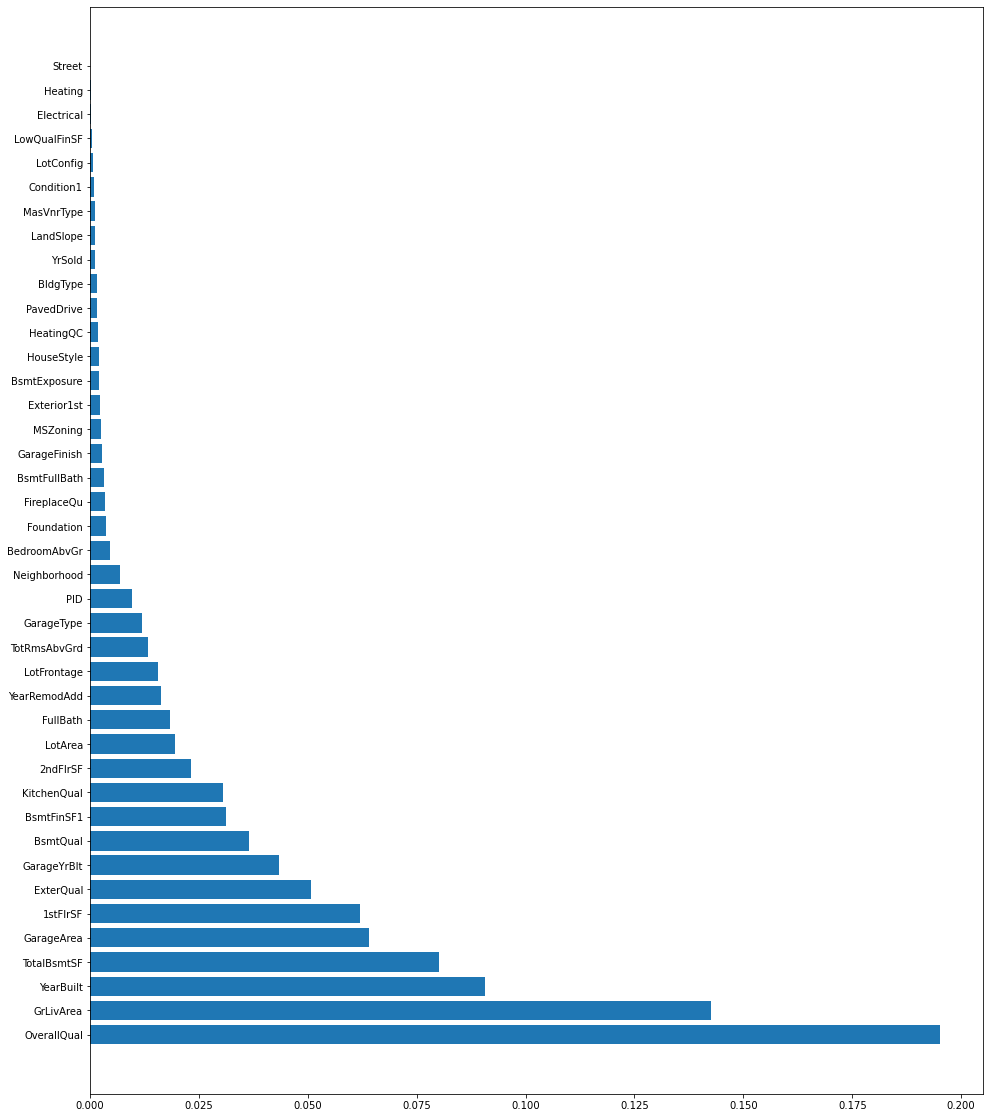

In [80]:
plt.rcParams["figure.figsize"] = (16, 20)
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.barh(features, importance)
